# Batting Average with Runners in Scoring Position

This notebook will test the hypothesis that a player's batting average is independent of whether there are runners in scoring postion, one may expect this from the batter's persepctive given that the objective is to try to get a hit no matter how many men are on base.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


First we import batting average data from www.fangraphs.com for qualified hitters from the 2002 season on.

In [2]:
avg=pd.read_csv('Splits Leaderboard Data .csv')

In [3]:
risp=pd.read_csv('Splits Leaderboard Data Runners in Scoring.csv')

In [4]:
avg=avg[['Season','Name','AVG']]

In [5]:
risp=risp[['Season','Name','AVG']]

In [6]:
risp=risp.rename(columns={'AVG':'RISPAVG'})

We can now examine our data frames, which contain a row for each players season stats

In [7]:
risp.head()

,Season,Name,RISPAVG
0,2002,Garret Anderson,0.316667
1,2002,David Eckstein,0.285714
2,2002,Darin Erstad,0.259036
3,2002,Jorge Fabregas,0.175439
4,2002,Brad Fullmer,0.264151


In [8]:
avg.head()

,Season,Name,AVG
0,2002,Garret Anderson,0.305643
1,2002,David Eckstein,0.292763
2,2002,Darin Erstad,0.283200
3,2002,Brad Fullmer,0.289044
4,2002,Troy Glaus,0.249561


Next we merge the two data frames so that we have each batters batting average (AVG) and AVG with RISP (runners in scoring position) in the same row

In [9]:
df=pd.merge(avg,risp)

In [10]:
df.head()

,Season,Name,AVG,RISPAVG
0,2002,Garret Anderson,0.305643,0.316667
1,2002,David Eckstein,0.292763,0.285714
2,2002,Darin Erstad,0.283200,0.259036
3,2002,Brad Fullmer,0.289044,0.264151
4,2002,Troy Glaus,0.249561,0.292683


Now we add a column for the difference between the batters average and RISP average

In [11]:
df['diff']=df['RISPAVG']-df['AVG']

In [12]:
df.head(20)

,Season,Name,AVG,RISPAVG,diff
0,2002,Garret Anderson,0.305643,0.316667,0.011024
1,2002,David Eckstein,0.292763,0.285714,-0.007049
2,2002,Darin Erstad,0.283200,0.259036,-0.024164
3,2002,Brad Fullmer,0.289044,0.264151,-0.024893
4,2002,Troy Glaus,0.249561,0.292683,0.043122
5,2002,Adam Kennedy,0.312236,0.273438,-0.038799
6,2002,Bengie Molina,0.245327,0.228346,-0.016981
7,2002,Orlando Palmeiro,0.300380,0.328767,0.028387
8,2002,Tim Salmon,0.285714,0.316129,0.030415
9,2002,Scott Spiezio,0.285132,0.335766,0.050634


We see that some batters will overperform and some will underperform with RISP, but under our null hypothesis the mean difference between a batters average and RISP avergae should be zero. We calculate the mean below

In [13]:
df['diff'].mean()

0.0027419397872998573

We see that on average, a batter will overperform his normal batting average by .0027 when a runner is in scoring position, Is this a significant deviation from our null hypothesis? 

To examine this, first note that by the Central Limit Theorem, the mean batting average difference should be distributed approximately normally. This can be seen from the histrogram below which shows the distribution of our sample with the normal distribution overlayed in orange

/home/bradley/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


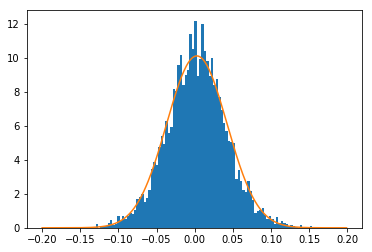

In [14]:
fig, ax = plt.subplots()


myHist = ax.hist(df['diff'], 100,normed=True)
x = np.arange(-.2, .2, 0.001)
h=ax.plot(x,(2*np.pi*df['diff'].var())**(-.5)*np.exp(-(x-df['diff'].mean())**2/(2*df['diff'].var())))
plt.show()

To see how significant our devitation is, we perform a T-test on our data, this will tell us the probability of getting a mean difference as large as we did from our sample, given that the actual mean is zero

In [15]:
df['diff'].std()

0.03948520423656717

In [16]:
(0-df['diff'].mean())/(df['diff'].std()/np.sqrt(len(df['diff'])))

-5.148098962296578

In [17]:
len(df['diff'])

5496

In [18]:
2*(1-stats.t.cdf(5.148,len(df['diff']-1)))

2.7244281119997993e-07

From the above calculations we  have a p-value of $2.72 \times 10^{-7}$ , meaning that
under the null hypothesis there is only a .000027% chance we would get a discrepancy this large, this strongly suggests that the null hypothesis is incorrect and runners in scoring postion do in fact impact a player's batting average.

Why might this be? One explanation may be that when there are runners in scoring position, the pitcher has likely already given up a hit that inning, this is indicitive that he is not pitching as well as he would be if he had not given up any hits. The  batter is therefore more likely to get a hit off a struggling pitcher.

Lets see if we can test this theory.  First, note that when a runner is in scoring position, a manager is more likely to take his pitcher out of the game and replace him with a new pitcher from the bullpen. This pitcher is less tired and more likely to get the batter out. 

We will repeat analysis from above but only for the first 5 innings of the game, when the manager is less likely to go to the bullpen. This should result in a greater difference between batting average with RISP and regular batting average because the batter is less likely to be facing a new pitcher.

In [19]:
early=pd.read_csv('Splits Leaderboard Data 1st Inning 2nd Inning 3rd Inning 4th Inning 5th Inning.csv')

In [20]:
earlyrisp=pd.read_csv("Splits Leaderboard Data 1st Inning 2nd Inning 3rd Inning 4th Inning 5th Inning Runners in Scoring.csv")

In [21]:
early=early[['Season','Name','AVG']]

In [22]:
earlyrisp=earlyrisp[['Season','Name','AVG']]

In [23]:
earlyrisp=earlyrisp.rename(columns={'AVG':'RISPAVG'})

In [24]:
df2=pd.merge(early,earlyrisp)

In [25]:
df2['diff']=df2['RISPAVG']-df2['AVG']

In [26]:
df2['diff'].mean()

0.0035251409503373314

We see that in the first five innings innings of the game, a batter does in fact hit even better with runners in scoring position than he does overall (a .0035 boost in batting average versus the .0027 we had before). Lets perform a T-test to see the significance of the result.

In [27]:
df2['diff'].std()

0.05354269946654774

In [29]:
(df['diff'].mean()-df2['diff'].mean())/(df2['diff'].std()/np.sqrt(len(df2['diff'])))

-1.0685158553671696

In [30]:
2*(1-stats.t.cdf(1.069,len(df2['diff']-1)))

0.2851180250451879

This time we have a p-value of .28 or a 28% chance of this occuring under the null hypothesis of there being no difference between early and late game. So although our mean difference is greater it is not statistically siginificant

Consequently, we still do not have a satisfying explantion for the discrepancy between batting averages. Our above explanation could still be correct though, notice that even though we only took data from the first five innings in our second T-test, we did not require the data to be from situations where the batter is facing the same pitcher that put the runner in scoring position initially. To truly test our theory, we need a data set that only lists a batters AVG in this particular situation, but unfortunately this data was not available. 

The takeaway from this analysis is that batters do in fact hit (slightly) better with runner's in scoring postition, approximately .003 better on average, but the reason for this discrepancy cannot be explained convincingly as of yet.